<a href="https://colab.research.google.com/github/nickstone1911/data-analysis-practice/blob/main/Data_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Data Engineering Using the BigQuery API Practice Exercises
## Lesson Objectives
In this lesson we perform Extract, Transform, and Load (`ETL`) opertions by:
1. `E`xtracting specific data from a large public dataset
2. `T`ransform and manipulate data for further data analysis
3. `L`oad data into a BigQuery data warehouse
4. Practice basic SQL commands
5. Perform feature engineering
6. Conduct descriptive analytics

---
## Lesson Resources
>- [Working with Google Colab and BigQuery Slides](https://docs.google.com/presentation/d/1ChXqucPjdvo_HCjVSxmIc_5ah3gxidijItk5K-BcZVA/edit#slide=id.p)
>- [listenbrainz public dataset](https://console.cloud.google.com/bigquery(analyticshub:projects/1057666841514/locations/us/dataExchanges/google_cloud_public_datasets_17e74966199/listings/listenbrainz)


---




# Notebook Setup

Run the code below in the next code cell to authenticate and create a BigQuery client() object:

```
from google.colab import auth
auth.authenticate_user()

from google.cloud import bigquery

project_id = '[your project id]'
client = bigquery.Client(project = project_id)
```

In [ ]:
# Authenticate
from google.colab import auth
auth.authenticate_user()

from google.cloud import bigquery

Create your `client()` object in the next cell.
>- When creating your client for this part of the notebook name it, `myclient`, and set the `project` parameter to your personal `project_id`


In [ ]:
# Instantiate a client() object
project_id = 'baim-412018'
myclient = bigquery.Client(project = project_id)

In [ ]:
# Import pandas
import pandas as pd

# Q1: Show the datasets currently in your project
>- Note: if you don't have any datasets yet you will return nothing but that's ok for now. We are going to build this out in this notebook.

In [ ]:
for dataset in myclient.list_datasets():
  print(dataset.dataset_id)

mydataset
mylistenbrainz
wine


# Q2: Create a New Dataset
>- This will serve as our musical data warehouse
>- Name the dataset, `mylistenbrainz`
>- Set the dataset location to "US"

---
In the next cell, using the `myclient` object you defined above, create a dataset named, `mylistenbrainz`.

Below is a sample from the [BigQuery Creating datasets doc](https://cloud.google.com/bigquery/docs/datasets) to help you with the code:

```
# TODO(developer): Set dataset_id to the ID of the dataset to create.
dataset_id = "[yourprojectid].[your_dataset_name]"

# Construct a full Dataset object to send to the API.
dataset = bigquery.Dataset(dataset_id)

# TODO(developer): Specify the geographic location where the dataset should reside.
dataset.location = "US"

# Send the dataset to the API for creation, with an explicit timeout.
# Raises google.api_core.exceptions.Conflict if the Dataset already
# exists within the project.
dataset = client.create_dataset(dataset, timeout=30)  # Make an API request.
print("Created dataset {}.{}".format(client.project, dataset.dataset_id))
```

In [ ]:
# create the new dataset variable which holds the name of the dataset
dataset_id = 'baim-412018.mylistenbrainz'

dataset = bigquery.Dataset(dataset_id)
# Set the locaiton
dataset.location = 'US'

dataset = myclient.create_dataset(dataset, timeout=30)  # Make an API request.
print(f"Created dataset {myclient.project}, {dataset.dataset_id}")

Conflict: 409 POST https://bigquery.googleapis.com/bigquery/v2/projects/baim-412018/datasets?prettyPrint=false: Already Exists: Dataset baim-412018:mylistenbrainz

## Q2b: Now print the datasets in your project
>- You should see the `mylistenbrainz` dataset printed out
>- Also, navigate to the BigQuery console and find your project and dataset listed there as well
---
If everything went right, you should see something similar to the following image in your project on the BigQuery console:

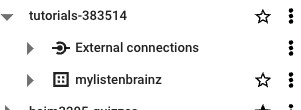

In [ ]:
for dataset in myclient.list_datasets():
  print(dataset.dataset_id)

mydataset
mylistenbrainz
wine


# Q3: Show the tables currently in your `mylistenbrainz` dataset
>- You shouldn't see any tables yet but still run the code that would print out your tables

In [ ]:
# Should not see any tables at this stage
tables = list(myclient.list_tables(dataset))

for table in tables:
  print(table.table_id)

# Q4: Extract Data from the public table `listenbrainz.listenbrainz.listen`
We will start by creating two tables based on different genres of music. Use the specifications below to create your tables.

## Table 1 Specifications
>- Name: `classicrock`
>- Initial Artist Names: "AC/DC, "Led Zeppelin", "ZZ Top", "Def Leppard"

## Table 2 Specifications
>- Name: `rap`
>- Intitial Artist Names: "2Pac", "Dr. Dre", "Snoop Dogg", "Eminem"
---
## SQL Notes

To filter rows of data in SQL we use the `WHERE` clause. The following code shows how you would filter results in the listenbrainz dataset for the first table:
```
SELECT
  *
FROM
  `listenbrainz.listenbrains.listen`
WHERE
  artist_name IN("AC/DC", "Led Zeppelin", "ZZ Top", "Def Leppard")
```
---
Use bigquery magics in the next code cells to extract each of these tables into two dataframes.

In [ ]:
classic_id = f'{project_id}.mylistenbrainz.classicrock'

job_config = bigquery.QueryJobConfig(destination = classic_id,
                                     write_disposition = "WRITE_TRUNCATE")

sql = '''
SELECT
  *
FROM
  `listenbrainz.listenbrainz.listen`
WHERE
  artist_name IN("AC/DC", "Led Zeppelin", "ZZ Top", "Def Leppard")
  '''

query_job = myclient.query(sql, job_config = job_config)

query_job.result()



In [ ]:
%%bigquery cdf --project baim-412018
SELECT
  *
FROM
  `listenbrainz.listenbrainz.listen`
WHERE
  artist_name IN("AC/DC", "Led Zeppelin", "ZZ Top", "Def Leppard")

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
cdf

,listened_at,user_name,artist_msid,artist_name,artist_mbids,release_msid,release_name,release_mbid,recording_msid,track_name,recording_mbid,tags
0,2018-03-29 19:56:23+00:00,pblsnchz,d4fcdced-a807-495b-b3f0-4eb8104ee186,ZZ Top,,a0d74b54-d677-4a01-9d38-6188e3914897,La Futura,,22d48fb5-6c35-4548-8f58-6a62306c2b55,Heartache in Blue,8b089aa9-986c-43ca-a8b1-3d51f8644b35,
1,2018-03-29 19:51:51+00:00,pblsnchz,d4fcdced-a807-495b-b3f0-4eb8104ee186,ZZ Top,,a0d74b54-d677-4a01-9d38-6188e3914897,La Futura,,75bac298-b889-4ad0-834e-6519c0d1a89c,Over You,0b0e9e2c-8a4c-47b6-a7ea-b7782b98e9be,
2,2018-03-29 20:04:58+00:00,pblsnchz,d4fcdced-a807-495b-b3f0-4eb8104ee186,ZZ Top,,a0d74b54-d677-4a01-9d38-6188e3914897,La Futura,,41eb839a-271e-4b09-b6b8-06a522d18ce5,Flyin' High,8fe0bed1-b41c-41d0-8a05-8fe76a7c5775,
3,2018-03-29 19:17:28+00:00,pblsnchz,d4fcdced-a807-495b-b3f0-4eb8104ee186,ZZ Top,,a0d74b54-d677-4a01-9d38-6188e3914897,La Futura,,f04d2611-1d20-4c50-88b4-e422a996a648,I Gotsta Get Paid,3e874600-002f-42e5-ad98-2d10d919f34a,
4,2018-03-29 19:48:01+00:00,pblsnchz,d4fcdced-a807-495b-b3f0-4eb8104ee186,ZZ Top,,a0d74b54-d677-4a01-9d38-6188e3914897,La Futura,,63ad47cc-32e2-404b-92fa-9845f1dd5d80,Consumption,97db1afe-352b-48e3-8886-5d9449e5308a,
...,...,...,...,...,...,...,...,...,...,...,...,...
465157,2006-01-06 20:15:00+00:00,Hawke,089c6d19-4157-4d57-9859-2c57e3d7ccf1,Led Zeppelin,,None,,,e6f7972e-0caf-485f-8448-cf84cbecda18,Interview With Chris Grant,,
465158,2007-09-15 05:58:03+00:00,loubat,089c6d19-4157-4d57-9859-2c57e3d7ccf1,Led Zeppelin,,None,,,c1ae9aed-0509-4da1-8888-c436cbfa7d7e,Baby Come on Home (Tribute to Bert Burns),,
465159,2005-12-17 07:12:00+00:00,Hawke,089c6d19-4157-4d57-9859-2c57e3d7ccf1,Led Zeppelin,,None,,,3a0126da-6fb0-438b-bb69-283b7f3ea1f7,The Battle of Evermore,,
465160,2012-10-13 22:26:28+00:00,eightiesSpandex,089c6d19-4157-4d57-9859-2c57e3d7ccf1,Led Zeppelin,,32ac7c48-80b8-4ba1-a815-a0bed133bb1f,,,726d98f0-1126-44bd-a451-a57f19183c58,Over The Hills And Far Away (live),,


In [ ]:
rap_id = f'{project_id}.mylistenbrainz.rap'

job_config = bigquery.QueryJobConfig(destination = rap_id,
                                     write_disposition = "WRITE_TRUNCATE")

sql = '''
SELECT
  *
FROM
  `listenbrainz.listenbrainz.listen`
WHERE
  artist_name IN("2Pac", "Dr. Dre", "Snoop Dogg", "Eminem")
  '''

query_job = myclient.query(sql, job_config = job_config)

rdf = query_job.result()

In [ ]:
%%bigquery rdf --project baim-412018
SELECT
  *
FROM
  `listenbrainz.listenbrainz.listen`
WHERE
  artist_name IN("2Pac", "Dr. Dre", "Snoop Dogg", "Eminem")

Query is running:   0%|          |

Downloading:   0%|          |

In the next cell, show the number of rows and columns in the classic rock and rap dataframes

In [ ]:
classic_table = myclient.get_table(classic_id)

print(f'Query results loaded to the table {classic_id}')
print(f'Loaded {classic_table.num_rows} rows and {len(classic_table.schema)} columns')

rap_table = myclient.get_table(rap_id)

print(f'Query results loaded to the table {rap_id}')
print(f'Loaded {rap_table.num_rows} rows and {len(rap_table.schema)} columns')

Query results loaded to the table baim-412018.mylistenbrainz.classicrock
Loaded 465162 rows and 12 columns
Query results loaded to the table baim-412018.mylistenbrainz.rap
Loaded 274541 rows and 12 columns


# Q5: Transform Data
Feature Engineering: Create Date Time Features

In the next cell create several new date features and add them to your listens DataFrame:
>- Create a `date` feature that removes the timestamp portion of the `listened_at` values
>- Create a `year` feature that shows the numerical year of the listen
>- Create a `month` feature that shows the numerical month of the listen
>- Create a `day` feature that shows the numerical day of the listen

Hint: Check out [pandas.Series.dt.year](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html) to help get you started with this feature engineering example

---

Because you are likely to do this operation many times, create a function `date_transform()` that takes in a dataframe and a column as parameters and performs the transformation.

In [ ]:
def date_transform(df, column):
  date = df[column].dt.date
  year = df[column].dt.year
  month = df[column].dt.month
  day = df[column].dt.day
  df['date'] = date
  df['year'] = year
  df['month'] = month
  df['day'] = day
date_transform(cdf,'listened_at')
cdf

,listened_at,user_name,artist_msid,artist_name,artist_mbids,release_msid,release_name,release_mbid,recording_msid,track_name,recording_mbid,tags,date,year,month,day
0,2018-03-29 19:56:23+00:00,pblsnchz,d4fcdced-a807-495b-b3f0-4eb8104ee186,ZZ Top,,a0d74b54-d677-4a01-9d38-6188e3914897,La Futura,,22d48fb5-6c35-4548-8f58-6a62306c2b55,Heartache in Blue,8b089aa9-986c-43ca-a8b1-3d51f8644b35,,2018-03-29,2018,3,29
1,2018-03-29 19:51:51+00:00,pblsnchz,d4fcdced-a807-495b-b3f0-4eb8104ee186,ZZ Top,,a0d74b54-d677-4a01-9d38-6188e3914897,La Futura,,75bac298-b889-4ad0-834e-6519c0d1a89c,Over You,0b0e9e2c-8a4c-47b6-a7ea-b7782b98e9be,,2018-03-29,2018,3,29
2,2018-03-29 20:04:58+00:00,pblsnchz,d4fcdced-a807-495b-b3f0-4eb8104ee186,ZZ Top,,a0d74b54-d677-4a01-9d38-6188e3914897,La Futura,,41eb839a-271e-4b09-b6b8-06a522d18ce5,Flyin' High,8fe0bed1-b41c-41d0-8a05-8fe76a7c5775,,2018-03-29,2018,3,29
3,2018-03-29 19:17:28+00:00,pblsnchz,d4fcdced-a807-495b-b3f0-4eb8104ee186,ZZ Top,,a0d74b54-d677-4a01-9d38-6188e3914897,La Futura,,f04d2611-1d20-4c50-88b4-e422a996a648,I Gotsta Get Paid,3e874600-002f-42e5-ad98-2d10d919f34a,,2018-03-29,2018,3,29
4,2018-03-29 19:48:01+00:00,pblsnchz,d4fcdced-a807-495b-b3f0-4eb8104ee186,ZZ Top,,a0d74b54-d677-4a01-9d38-6188e3914897,La Futura,,63ad47cc-32e2-404b-92fa-9845f1dd5d80,Consumption,97db1afe-352b-48e3-8886-5d9449e5308a,,2018-03-29,2018,3,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465157,2006-01-06 20:15:00+00:00,Hawke,089c6d19-4157-4d57-9859-2c57e3d7ccf1,Led Zeppelin,,None,,,e6f7972e-0caf-485f-8448-cf84cbecda18,Interview With Chris Grant,,,2006-01-06,2006,1,6
465158,2007-09-15 05:58:03+00:00,loubat,089c6d19-4157-4d57-9859-2c57e3d7ccf1,Led Zeppelin,,None,,,c1ae9aed-0509-4da1-8888-c436cbfa7d7e,Baby Come on Home (Tribute to Bert Burns),,,2007-09-15,2007,9,15
465159,2005-12-17 07:12:00+00:00,Hawke,089c6d19-4157-4d57-9859-2c57e3d7ccf1,Led Zeppelin,,None,,,3a0126da-6fb0-438b-bb69-283b7f3ea1f7,The Battle of Evermore,,,2005-12-17,2005,12,17
465160,2012-10-13 22:26:28+00:00,eightiesSpandex,089c6d19-4157-4d57-9859-2c57e3d7ccf1,Led Zeppelin,,32ac7c48-80b8-4ba1-a815-a0bed133bb1f,,,726d98f0-1126-44bd-a451-a57f19183c58,Over The Hills And Far Away (live),,,2012-10-13,2012,10,13


In [ ]:
date_transform(rdf,'listened_at')
rdf

,listened_at,user_name,artist_msid,artist_name,artist_mbids,release_msid,release_name,release_mbid,recording_msid,track_name,recording_mbid,tags,date,year,month,day
0,2008-09-03 17:28:17+00:00,twigglish,b2f99f75-47f4-45b5-bb75-3724eb7eb610,2Pac,,bbc8e357-3acd-4639-825d-db0ba50eb3be,Greatest Hits (disc 1),,d6c653ff-74e7-4131-af35-c9dfb0f0190b,Hail Mary,2930e706-5462-4825-a44a-982e5df71095,,2008-09-03,2008,9,3
1,2010-05-11 01:20:27+00:00,savajon,b2f99f75-47f4-45b5-bb75-3724eb7eb610,2Pac,,cd2c0d4d-7aa7-428a-b06f-b69e2d714e72,Bravo: The Hits 99 (disc 1),,d9aef17f-21f2-4c3b-893e-28960e9db932,Changes,6b0df588-686d-4c89-97ce-ba1db77f5e56,,2010-05-11,2010,5,11
2,2013-11-21 01:08:32+00:00,l2yz,b2f99f75-47f4-45b5-bb75-3724eb7eb610,2Pac,,7903019a-b69b-462b-82e0-b431343ab9b5,2Pacalypse Now,,00dd6ef6-9634-428c-b98a-ad3826882896,I Don't Give a Fuck,20efb7dd-3963-448c-be90-fdb887db6d7c,,2013-11-21,2013,11,21
3,2008-12-02 01:57:56+00:00,twigglish,b2f99f75-47f4-45b5-bb75-3724eb7eb610,2Pac,,9790bc91-0936-4742-98c5-d8983b2669a1,R U Still Down? [Remember Me],,71267330-e7fe-49ac-b19c-e2a53e3b6147,Hold On Be Strong,fbcffcaf-b1a2-498b-b5a2-74e0f5242176,,2008-12-02,2008,12,2
4,2012-07-09 00:08:50+00:00,Jongusmoe,b2f99f75-47f4-45b5-bb75-3724eb7eb610,2Pac,,94afd3f7-46b8-4ec6-91d8-1e9ec6db5c84,Thug Life,,b1c20ec9-6044-41d8-bf4f-137c078e1a8d,Pour Out A Little Liquor,d7aeaf94-9f74-4eae-8844-b0079be96a5f,,2012-07-09,2012,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274536,2012-08-27 17:39:49+00:00,arealcoolhand,b8d4441b-73d5-4fc1-874d-1ead8cda547e,Snoop Dogg,,27a6bdec-0d3e-4f4d-a6eb-663913fe98c3,,,bb976a6b-f891-4468-a305-2b7ac9ef6294,G Funk Intro,,,2012-08-27,2012,8,27
274537,2009-07-06 20:39:01+00:00,[kol],b8d4441b-73d5-4fc1-874d-1ead8cda547e,Snoop Dogg,,ed43dd27-49b4-4b5e-98a2-df04bda393e4,,,1b95b9c5-73a2-4f3d-bb47-ba9865a57ae0,From Tha Chuuuch To Da Palace (feat. Pharrell),,,2009-07-06,2009,7,6
274538,2013-09-07 17:00:43+00:00,ph15h,b8d4441b-73d5-4fc1-874d-1ead8cda547e,Snoop Dogg,,None,,,374c8a03-f2da-421e-8122-7500758d0a6a,Sweat (Snoop Dogg vs. David Guetta) [Remix],,,2013-09-07,2013,9,7
274539,2013-06-11 15:49:34+00:00,qleeth,b8d4441b-73d5-4fc1-874d-1ead8cda547e,Snoop Dogg,,fdf702f8-b9aa-4545-95da-767003c015a6,,,fb2dd280-e1ac-4fcd-9b3d-76c6dfddf07f,Vato (feat. B-Real),,,2013-06-11,2013,6,11


# Q6: Clean Up the Empty `release_name` values

Insert missing `release_name` values with "No Release Name"
>- Fill in the missing or blank values for `release_name` with the string literal, "No Release Name".
>- Store the results of the filled in `release_name` column in a new column named, `release_name_clean`

In [ ]:
cdf['release_name_clean'] = cdf['release_name']
rdf['release_name_clean'] = rdf['release_name']

In [ ]:
cdf.release_name_clean.replace('', 'No Release Name', inplace = True)
rdf.release_name_clean.replace('', 'No Release Name', inplace = True)
cdf

,listened_at,user_name,artist_msid,artist_name,artist_mbids,release_msid,release_name,release_mbid,recording_msid,track_name,recording_mbid,tags,date,year,month,day,release_name_clean
0,2018-03-29 19:56:23+00:00,pblsnchz,d4fcdced-a807-495b-b3f0-4eb8104ee186,ZZ Top,,a0d74b54-d677-4a01-9d38-6188e3914897,La Futura,,22d48fb5-6c35-4548-8f58-6a62306c2b55,Heartache in Blue,8b089aa9-986c-43ca-a8b1-3d51f8644b35,,2018-03-29,2018,3,29,La Futura
1,2018-03-29 19:51:51+00:00,pblsnchz,d4fcdced-a807-495b-b3f0-4eb8104ee186,ZZ Top,,a0d74b54-d677-4a01-9d38-6188e3914897,La Futura,,75bac298-b889-4ad0-834e-6519c0d1a89c,Over You,0b0e9e2c-8a4c-47b6-a7ea-b7782b98e9be,,2018-03-29,2018,3,29,La Futura
2,2018-03-29 20:04:58+00:00,pblsnchz,d4fcdced-a807-495b-b3f0-4eb8104ee186,ZZ Top,,a0d74b54-d677-4a01-9d38-6188e3914897,La Futura,,41eb839a-271e-4b09-b6b8-06a522d18ce5,Flyin' High,8fe0bed1-b41c-41d0-8a05-8fe76a7c5775,,2018-03-29,2018,3,29,La Futura
3,2018-03-29 19:17:28+00:00,pblsnchz,d4fcdced-a807-495b-b3f0-4eb8104ee186,ZZ Top,,a0d74b54-d677-4a01-9d38-6188e3914897,La Futura,,f04d2611-1d20-4c50-88b4-e422a996a648,I Gotsta Get Paid,3e874600-002f-42e5-ad98-2d10d919f34a,,2018-03-29,2018,3,29,La Futura
4,2018-03-29 19:48:01+00:00,pblsnchz,d4fcdced-a807-495b-b3f0-4eb8104ee186,ZZ Top,,a0d74b54-d677-4a01-9d38-6188e3914897,La Futura,,63ad47cc-32e2-404b-92fa-9845f1dd5d80,Consumption,97db1afe-352b-48e3-8886-5d9449e5308a,,2018-03-29,2018,3,29,La Futura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465157,2006-01-06 20:15:00+00:00,Hawke,089c6d19-4157-4d57-9859-2c57e3d7ccf1,Led Zeppelin,,None,,,e6f7972e-0caf-485f-8448-cf84cbecda18,Interview With Chris Grant,,,2006-01-06,2006,1,6,No Release Name
465158,2007-09-15 05:58:03+00:00,loubat,089c6d19-4157-4d57-9859-2c57e3d7ccf1,Led Zeppelin,,None,,,c1ae9aed-0509-4da1-8888-c436cbfa7d7e,Baby Come on Home (Tribute to Bert Burns),,,2007-09-15,2007,9,15,No Release Name
465159,2005-12-17 07:12:00+00:00,Hawke,089c6d19-4157-4d57-9859-2c57e3d7ccf1,Led Zeppelin,,None,,,3a0126da-6fb0-438b-bb69-283b7f3ea1f7,The Battle of Evermore,,,2005-12-17,2005,12,17,No Release Name
465160,2012-10-13 22:26:28+00:00,eightiesSpandex,089c6d19-4157-4d57-9859-2c57e3d7ccf1,Led Zeppelin,,32ac7c48-80b8-4ba1-a815-a0bed133bb1f,,,726d98f0-1126-44bd-a451-a57f19183c58,Over The Hills And Far Away (live),,,2012-10-13,2012,10,13,No Release Name


# Q7: Load Data to BigQuery

In the next cell:
>- Use the BigQuery API and your personal client, `myclient`, to load your transformed and cleaned `classicrock` and `rap` DataFrames to BigQuery
>- Name your tables `classicrock` and `rap`

In the next cell, load the classicrock table

In [ ]:
classic_id = f'{project_id}.mylistenbrainz.classicrock'

job_config = bigquery.LoadJobConfig(autodetect = True,
                                    write_disposition = "WRITE_TRUNCATE") #overwrites existing table


load_job = myclient.load_table_from_dataframe(dataframe = cdf,
                                                destination = classic_id,
                                                job_config = job_config)

load_job.result()

classic_table = myclient.get_table(classic_id)

print(f'Loaded {classic_table.num_rows} rows')

Loaded 465162 rows


In the next cell, load the rap table

In [ ]:
rap_id = f'{project_id}.mylistenbrainz.rap'

job_config = bigquery.LoadJobConfig(autodetect = True,
                                    write_disposition = "WRITE_TRUNCATE") #overwrites existing table


load_job = myclient.load_table_from_dataframe(dataframe = rdf,
                                                destination = rap_id,
                                                job_config = job_config)

load_job.result()

rap_table = myclient.get_table(rap_id)

print(f'Loaded {rap_table.num_rows} rows')

Loaded 274541 rows


# Q8: Now, print out the tables in you `mylistenbrainz` dataset.

In [ ]:
dataset_id = 'baim-412018.mylistenbrainz'

dataset = bigquery.Dataset(dataset_id)

tables = list(myclient.list_tables(dataset))

for table in tables:
  print(table.table_id)

classicrock
rap


# Q9: Show a pivot table which will show the total number of listens per year and artist for the `classicrock` data.
>- Use the `listened_at` column as your values argument
>- Use the year as your pivot table index
>- Show artist names as your columns
>- Use the count function as your aggreation function
>- Include summaries for each year and artist in your pivot table. You will need to set a parameter for this so check out the documentation below.
>>- Rename the summary label as "Total"

Hint: check out the documentation below
>- [pivot table doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot_table.html)

In [ ]:
cdf.pivot_table(values = 'listened_at',

 index = 'year',

 columns = 'artist_name',

 aggfunc = 'count',

 margins = True,

 margins_name = "Total")

artist_name,AC/DC,Def Leppard,Led Zeppelin,ZZ Top,Total
year,,,,,
1970,773,118,945,58,1894
2005,2234,730,4227,1202,8393
2006,5094,914,11167,1834,19009
2007,9120,1370,17317,4112,31919
2008,13250,2406,17576,4025,37257
2009,12076,1908,20513,3285,37782
2010,11123,2568,21778,3135,38604
2011,9557,2607,18169,5789,36122
2012,10793,3051,24258,5601,43703


# Q10: Show a pivot table which will show the total number of listens per year and artist for the `rap` data.
>- Use the `listened_at` column as your values argument
>- Use the year as your pivot table index
>- Show artist names as your columns
>- Use the count function as your aggreation function
>- Include summaries for each year and artist in your pivot table. You will need to set a parameter for this so check out the documentation below.
>>- Rename the summary label as "Total"

Hint: check out the documentation below
>- [pivot table doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot_table.html)

In [ ]:
rdf.pivot_table(values = 'listened_at',

 index = 'year',

 columns = 'artist_name',

 aggfunc = 'count',

 margins = True,

 margins_name = "Total")

artist_name,2Pac,Dr. Dre,Eminem,Snoop Dogg,Total
year,,,,,
1970,225,137,643,169,1174
2005,865,774,2257,484,4380
2006,2819,1136,3782,1654,9391
2007,1002,974,3074,892,5942
2008,2548,1472,3991,2363,10374
2009,2403,2258,10314,1999,16974
2010,3153,1757,16714,1407,23031
2011,4260,3376,14029,2512,24177
2012,5151,2566,11285,2161,21163
